In [2]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
db_name = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt.sqlite'
db_conn = sqlite3.connect(db_name)
elution_df = pd.read_sql_query("select * from elution_profile order by retention_time_secs", db_conn)
feature_list_df = pd.read_csv("/home/ubuntu/HeLa_20KInt/HeLa_20KInt-feature-list.csv")
db_conn.close()

In [4]:
feature_list_df.head()

,feature_id,charge_state,monoisotopic_mass,centroid_scan,centroid_rt,centroid_mz,base_peak_centroid_mz,start_rt,end_rt,scan_lower,scan_upper,summed_intensity,isotope_count
0,1,3,1960.915588,680.366484,4013.127018,654.717577,654.645757,4005.957188,4021.318195,668,688,7033805,2
1,2,2,1247.602054,574.224714,1085.766969,625.127677,624.809083,1075.177570,1097.628037,565,585,6018645,4
2,3,2,1789.900380,379.472823,4433.432999,896.216859,896.459161,4421.919624,4439.635599,367,387,4045015,3
3,4,2,1405.719333,527.432220,4034.358108,704.126734,703.867085,4022.496117,4044.962866,519,539,8039223,5
4,5,2,2214.082282,231.310785,5002.872698,1108.270682,1108.049241,4991.075059,5008.786578,221,241,2472405,3


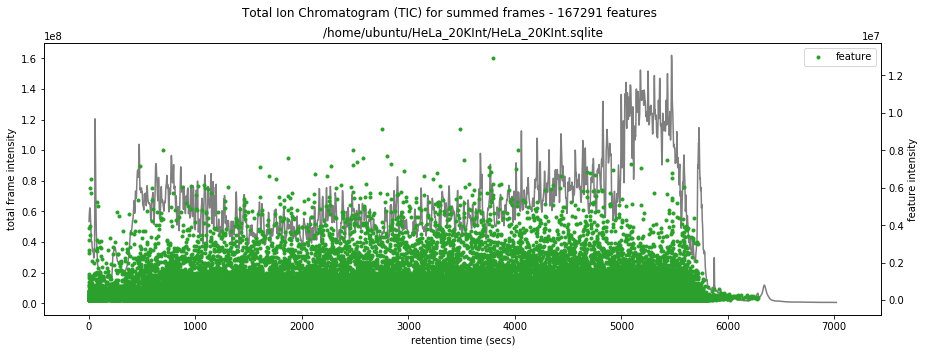

In [5]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(15)
ax2 = ax1.twinx()
ax1.set_ylabel('total frame intensity')
ax1.set_xlabel('retention time (secs)')
ax2.set_ylabel('feature intensity')
ax2.set_xlabel('retention time (secs)')
ax1.plot(elution_df.retention_time_secs, elution_df.intensity, marker='', linestyle='-', ms=5, color='tab:gray', label='frame')
ax2.plot(feature_list_df.centroid_rt, feature_list_df.summed_intensity, marker='o', linestyle='', ms=3, color='tab:green', label='feature')
plt.legend(loc='best')
ax2.legend(loc=0)
plt.margins(0.06)
plt.suptitle('Total Ion Chromatogram (TIC) for summed frames - {} features'.format(len(feature_list_df)))
plt.title('{}'.format(db_name))
plt.show()